In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the uploaded file
file_path = '/content/drive/MyDrive/Colab Notebooks/5002/data/Data_Q7/socialmedia.graph.txt'
data = pd.read_csv(file_path, delimiter='\t', comment='#', names=['FromNodeId', 'ToNodeId'])
data

,FromNodeId,ToNodeId
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
2987619,1157712,1157713
2987620,1157728,1157756
2987621,1157759,1157760
2987622,1157803,1157805


In [9]:
from_nodes = data['FromNodeId']
to_nodes = data['ToNodeId']
all_nodes = pd.concat([from_nodes, to_nodes])
num_unique_users = all_nodes.nunique()
max_id = all_nodes.max()
print("The number of unique users: ", num_unique_users)
print("The maximum ID: ", max_id)

The number of unique users:  1134890
The maximum ID:  1157827


In [3]:
# Create the graph
G = nx.from_pandas_edgelist(data, 'FromNodeId', 'ToNodeId')

### a. Calculate and plot the clustering coefficient and degree distribution of the network

In [4]:
# Clustering coefficient
clustering_coefficients = nx.clustering(G)
# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]

In [5]:
average_clustering_coefficient = sum(clustering_coefficients.values()) / len(G.nodes())
average_degree = sum(degrees) / len(G.nodes())

print("average_clustering_coefficient:", average_clustering_coefficient)
print("average_degree:", average_degree)

average_clustering_coefficient: 0.08080227776187864
average_degree: 5.265045951590022


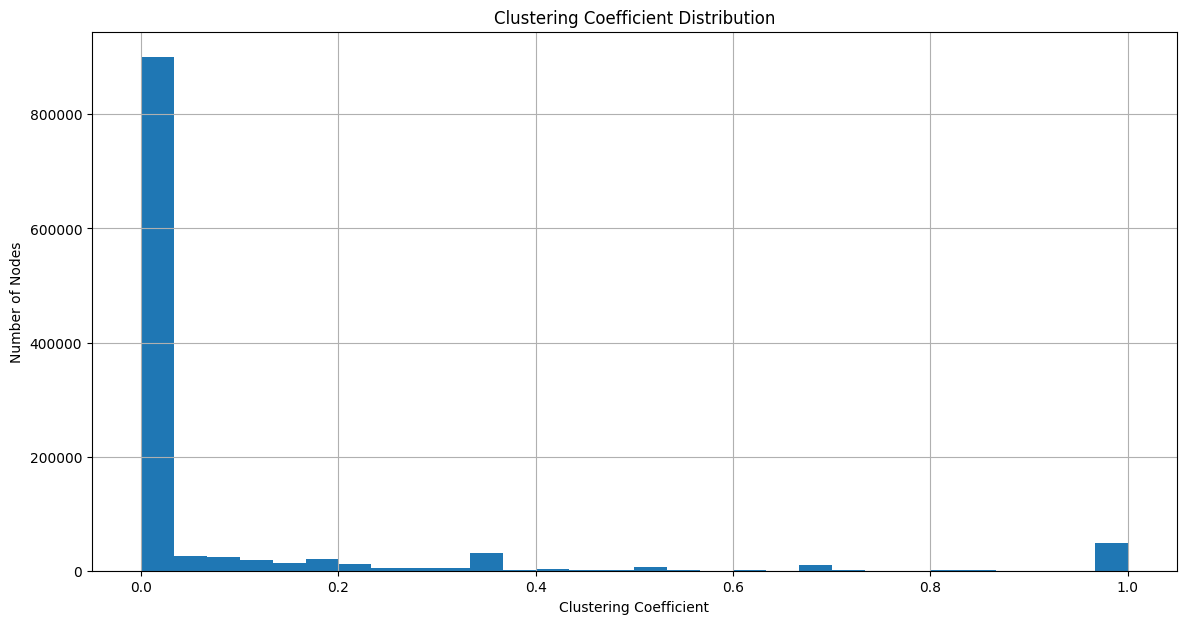

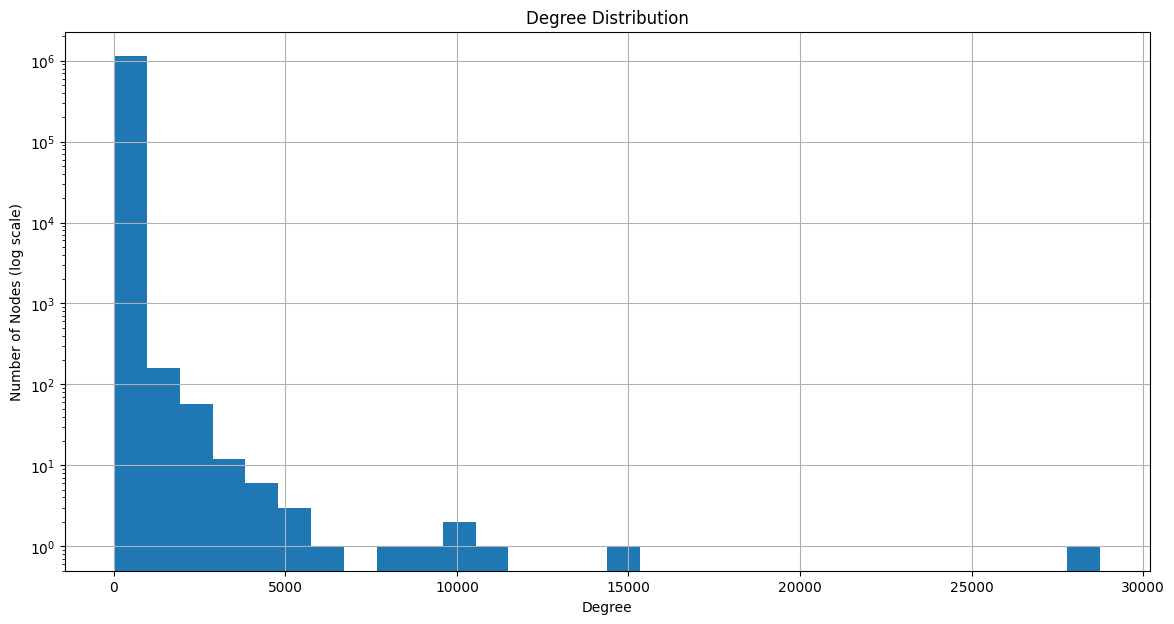

In [ ]:
# Plotting the clustering coefficient
plt.figure(figsize=(14, 7))
plt.hist(clustering_coefficients.values(), bins=30)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

# Plotting the degree distribution
plt.figure(figsize=(14, 7))
plt.hist(degrees, bins=30, log=True)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes (log scale)')
plt.grid(True)
plt.show()

## b. Identify the most influential nodes in a network and analyze them.

Please use centrality metrics such as degree centrality and then
visualize.

In [ ]:
degree_centrality = nx.degree_centrality(G)
# Sort nodes by degree centrality
influential_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

In [ ]:
influential_nodes[:5]

[(1072, 0.025336398537654344),
 (363, 0.012900821137573806),
 (35661, 0.009940179171707541),
 (106, 0.009217641549085418),
 (482709, 0.008601722282972167)]

In [ ]:
# Find the node with the highest degree centrality
most_influential_node = max(degree_centrality, key=degree_centrality.get)

# Find the neighbors of this node
neighbors = list(G.neighbors(most_influential_node))

# Create a subgraph containing the most influential node and its neighbors
subgraph_nodes = neighbors + [most_influential_node]
H = G.subgraph(subgraph_nodes)

In [ ]:
# Use the spring_layout algorithm with reduced iterations to speed up the computation
subgraph_positions = nx.spring_layout(H, iterations=20)

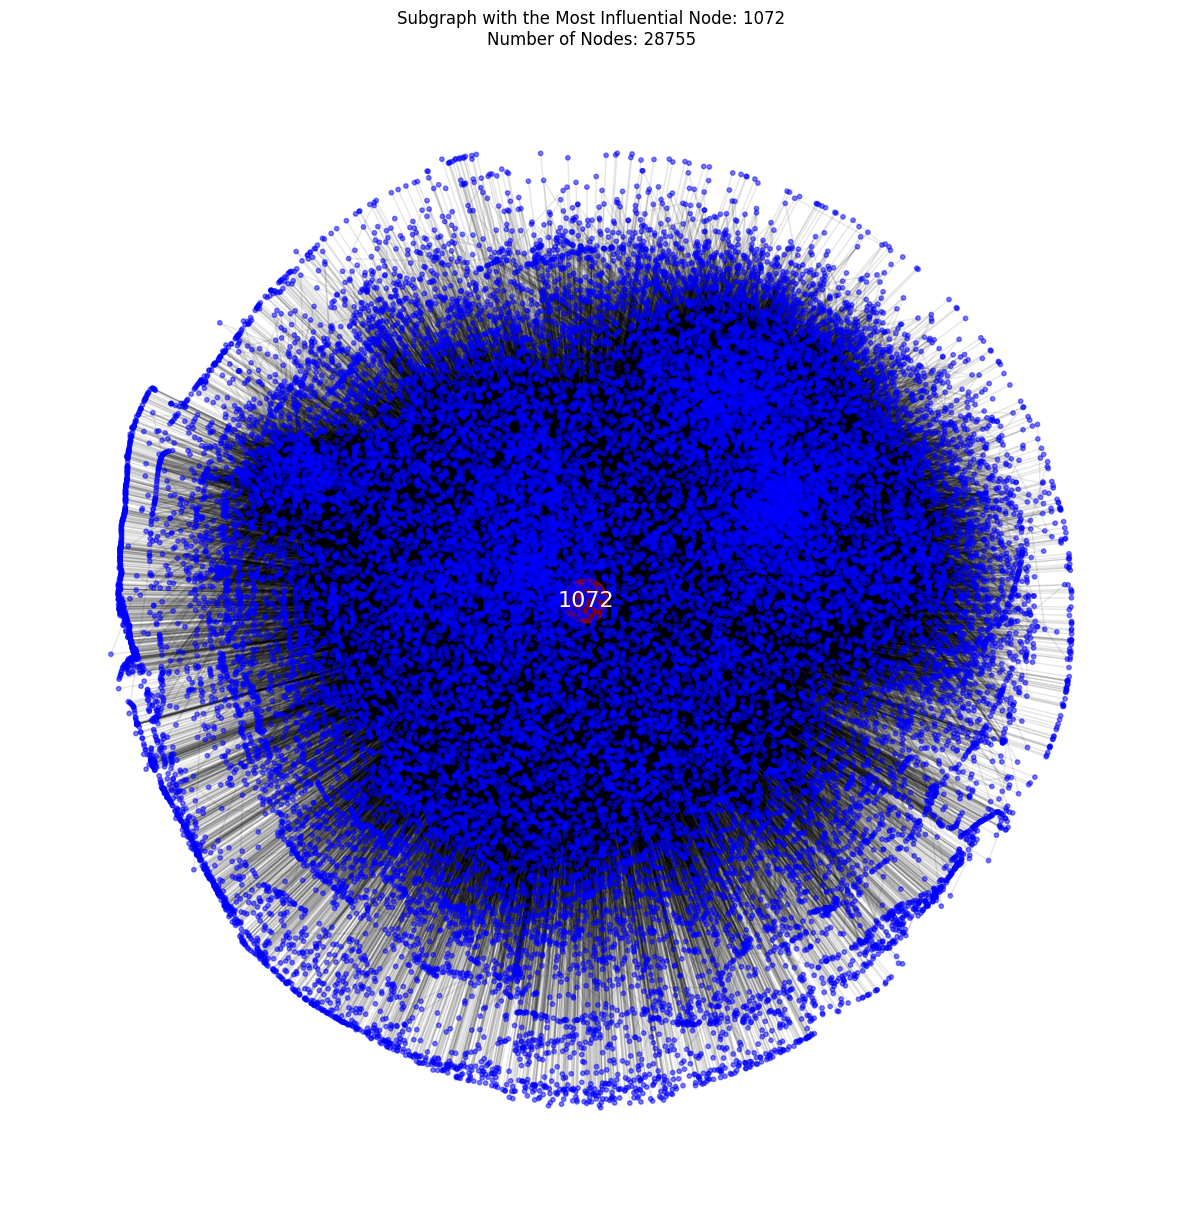

In [ ]:
# Set the color of the most influential node to red, others to blue
node_colors = ['red' if n == most_influential_node else 'blue' for n in H.nodes()]

# Set the size of the most influential node larger than others
node_sizes = [1000 if n == most_influential_node else 10 for n in H.nodes()]

# Visualize the subgraph
plt.figure(figsize=(15, 15))  # Increase the figure size for better visibility
nx.draw_networkx_nodes(H, subgraph_positions, node_size=node_sizes, node_color=node_colors, alpha=0.5)  # Reduced alpha for other nodes
nx.draw_networkx_labels(H, subgraph_positions, labels={most_influential_node: str(most_influential_node)}, font_size=16, font_color='white')  # Increased font size
nx.draw_networkx_edges(H, subgraph_positions, alpha=0.1)  # Reduced alpha for edges
plt.title(f'Subgraph with the Most Influential Node: {most_influential_node}\nNumber of Nodes: {H.number_of_nodes()}')
plt.axis('off')
plt.show()

##c. Identify Isolated Nodes in the Network

In [ ]:
#isolated_nodes = list(nx.isolates(G))
#len(isolated_nodes)=0

In [11]:
# Create a set of all possible user IDs
all_user_ids = set(range(1, max_id + 1))  # From 1 to the maximum user ID
# Create a set of user IDs that appear in the dataset
nodes_in_graph = set(all_nodes)
# Find the isolated user IDs
isolated_users = all_user_ids - nodes_in_graph
# Calculate the number of isolated users
num_isolated_users = len(isolated_users)
print(f"Number of isolated users: {num_isolated_users}")

Number of isolated users: 22937


In [14]:
print("The number of unique users: ", num_unique_users)
print("The maximum ID: ", max_id)
print(f"Number of isolated users: {max_id-num_unique_users}")

The number of unique users:  1134890
The maximum ID:  1157827
Number of isolated users: 22937


##d. Recognize Connected Components in the Network

In [15]:
connected_components = list(nx.connected_components(G))

In [ ]:
len(connected_components)

1

In [17]:
for i, component in enumerate(connected_components):
    num_nodes = len(component)
    print(f"Connected Component {i+1}: Number of Nodes = {num_nodes}")

Connected Component 1: Number of Nodes = 1134890


## e. Compute Average Shortest Path Length of the Network.

In [ ]:
# This might not be feasible for a large network
#average_shortest_path_length = nx.average_shortest_path_length(G)

In [ ]:
#Using approximation method
import random
def approximate_average_shortest_path_length(G, sample_size=1000):
    if sample_size > len(G):
        sample_size = len(G)
    random_nodes = random.choices(list(G.nodes()), k=sample_size)
    lengths = []
    for node in random_nodes:
        path_lengths = nx.single_source_shortest_path_length(G, node)
        lengths.extend(path_lengths.values())
    return sum(lengths) / len(lengths)

approx_avg_path_length = approximate_average_shortest_path_length(G)

In [ ]:
approx_avg_path_length

5.256447320885725

##f. Calculate the Diameter of the Network

In [ ]:
# This might not be feasible for a large network
#diameter = nx.diameter(G)

In [ ]:
def approximate_diameter(G, sample_size=1000):
    if sample_size > len(G):
        sample_size = len(G)
    random_nodes = random.choices(list(G.nodes()), k=sample_size)
    eccentricities = (nx.eccentricity(G.subgraph(nx.node_connected_component(G, n)), n) for n in random_nodes)
    return max(eccentricities)

approx_diameter = approximate_diameter(G)
approx_diameter

20

## g. Detect Community Structures in the Network.

In [ ]:
import networkx as nx
from community import community_louvain
import random
import matplotlib.pyplot as plt
import seaborn as sns

partition = community_louvain.best_partition(G)

In [ ]:
num_communities = len(set(partition.values()))
community_sizes = [list(partition.values()).count(i) for i in range(num_communities)]
print(f"Number of communities detected: {num_communities}")
print("Sizes of communities:", community_sizes)

# Calculating modularity of the partition
modularity = community_louvain.modularity(partition, G)
print(f"Modularity of the partition: {modularity}")

Number of communities detected: 5769
Sizes of communities: [192813, 59802, 14403, 3244, 23895, 132482, 8108, 37204, 97210, 99058, 11893, 12832, 10674, 4376, 9053, 21233, 8064, 1436, 1678, 17147, 3093, 38180, 49610, 1994, 3209, 1482, 547, 2782, 14724, 7457, 5489, 7106, 14072, 2974, 1492, 3499, 2794, 4413, 21126, 10556, 8734, 2501, 1680, 6690, 7, 4, 7, 5227, 13733, 7, 11, 8, 6, 11221, 2016, 4426, 6, 8, 970, 2189, 13075, 10, 992, 4627, 1442, 8, 7, 2776, 13, 4, 2035, 5317, 530, 18, 13, 8, 1024, 6, 5, 2847, 1958, 11, 17, 2011, 2925, 7, 4, 4, 7, 4, 6, 5, 7, 1129, 9, 13, 1580, 1264, 8, 45, 14, 7, 4, 8, 1984, 1387, 15, 836, 1120, 1358, 1363, 42, 1275, 3155, 27, 1469, 12, 1411, 4, 15, 8, 10, 24, 9, 5, 9, 4, 4, 4, 4, 4, 6, 16, 4, 9, 4, 4, 5, 4, 6, 4, 59, 4, 12, 7, 4, 1918, 8, 7, 114, 7, 23, 1670, 5, 8, 25, 7, 6, 5, 14, 6, 7, 5, 4, 8, 4, 5, 4, 5, 6, 9, 13, 8, 6, 6, 6, 7, 7, 12, 7, 9, 9, 6, 12, 11, 10, 8, 4, 7, 10, 7, 30, 270, 15, 4, 3, 5, 4, 6, 116, 19, 9, 5, 7, 26, 16, 8, 13, 19, 19, 5, 4, 33, 2

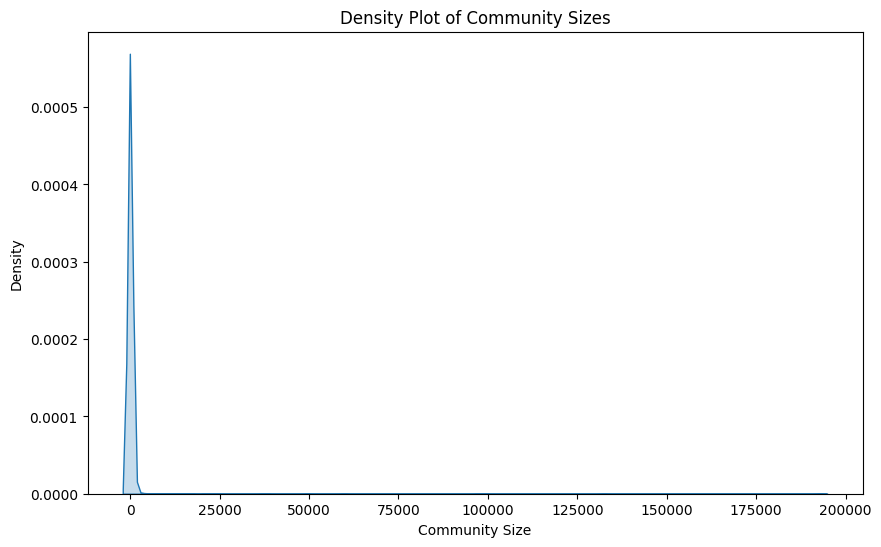

In [ ]:
# Density Plot of Community Sizes
plt.figure(figsize=(10, 6))
sns.kdeplot(community_sizes, shade=True)
plt.title('Density Plot of Community Sizes')
plt.xlabel('Community Size')
plt.ylabel('Density')
plt.show()

In [ ]:
#create a dictionary to store the community membership of each node
node_community_dict = {node: community_id for node, community_id in partition.items()}

In [ ]:
'''#create a dictionary to store the nodes belonging to each community
community_nodes_dict = {community_id: [] for community_id in set(partition.values())}
for node, community_id in partition.items():
    community_nodes_dict[community_id].append(node)'''

communities = {}
for node, community_id in partition.items():
    communities.setdefault(community_id, []).append(node)

In [ ]:
#Density of communities
community_density = []
for community_id in range(num_communities):
    nodes_in_community = [node for node, c_id in node_community_dict.items() if c_id == community_id]
    subgraph = G.subgraph(nodes_in_community)
    density = nx.density(subgraph)
    community_density.append(density)

print("Density of communities:", community_density)

Density of communities: [2.4138908558066548e-05, 7.300167317866367e-05, 0.00021542480768372841, 0.0007149991654224046, 9.91685517361301e-05, 5.6671431103416454e-05, 0.00029587006886007687, 9.089658445965407e-05, 7.703620325985213e-05, 5.3430824754398994e-05, 0.00021218744139391355, 0.00021154298028601632, 0.0003681590053657187, 0.0009572212065813528, 0.0002651445391622438, 0.00010962269527488652, 0.00029455537641076524, 0.0014869022546174526, 0.0015621857238399635, 0.00017431826812389073, 0.0008371363120579834, 0.00016773844021197, 5.566123335237453e-05, 0.001209348064263035, 0.0006910504977817221, 0.0016092274523633137, 0.004044706055674977, 0.0007899966161466933, 0.00015852832280134372, 0.0003396799734788467, 0.0004044664999227185, 0.00032886937979283447, 0.0001665192712875889, 0.0008048224199367949, 0.001540071528365906, 0.0006313982382616548, 0.0009018865806504194, 0.0005492508637321653, 0.0001292756282815925, 0.00022488170285422772, 0.0002925242358400872, 0.0009148340663734506, 0.

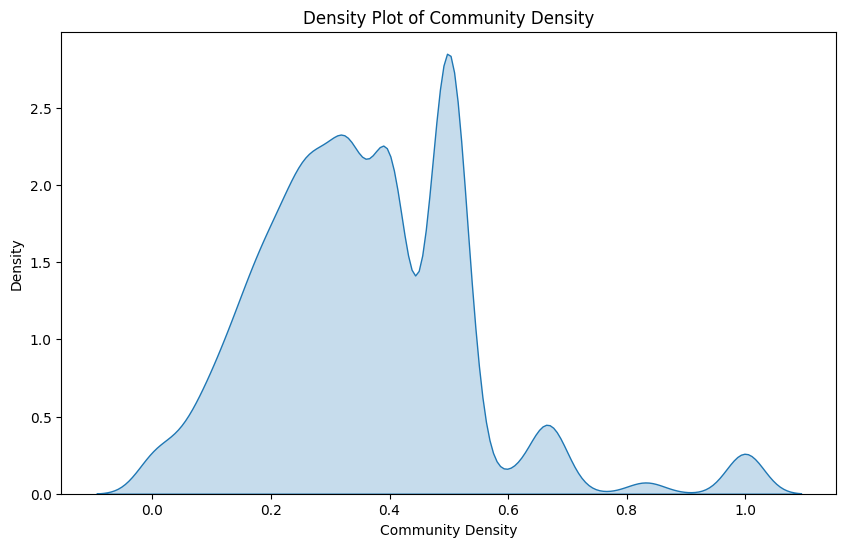

In [ ]:
#Density Plot of Community Density
plt.figure(figsize=(10, 6))
sns.kdeplot(community_density, shade=True)
plt.title('Density Plot of Community Density')
plt.xlabel('Community Density')
plt.ylabel('Density')
plt.show()

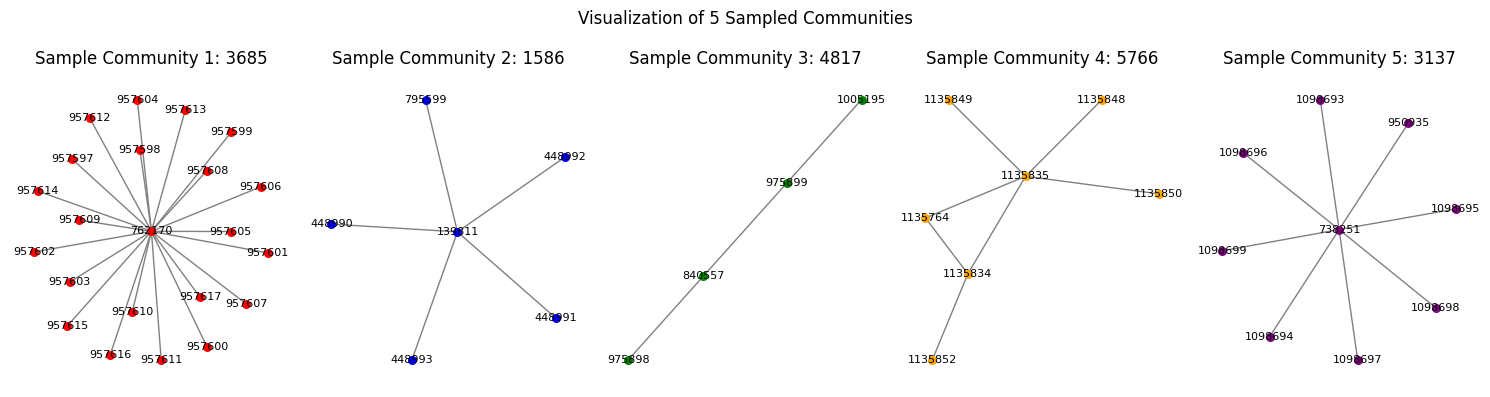

In [ ]:
# Randomly select five communities for visualization
sampled_communities = random.sample(list(communities.values()), 5)

# Predefined color order
color_order = ['red', 'blue', 'green', 'orange', 'purple']

# Set up the canvas
plt.figure(figsize=(15, 4))

# Create a subplot for each community
for i, community_nodes in enumerate(sampled_communities, start=1):
    plt.subplot(1, 5, i)
    subgraph = G.subgraph(community_nodes)
    pos = nx.spring_layout(subgraph)

    # Get the color for the current community
    community_color = color_order[i-1]

    # Draw the subgraph with node size, edge color, and node color settings
    nx.draw(subgraph, pos, node_size=30, edge_color="gray", node_color=community_color, with_labels=False)

    # Draw node labels with font size settings
    labels = {node: node for node in community_nodes}
    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8)

    # Get the community ID
    community_id = list(communities.keys())[list(communities.values()).index(community_nodes)]

    plt.title(f"Sample Community {i}: {community_id}")

plt.suptitle("Visualization of 5 Sampled Communities")
plt.tight_layout()
plt.show()

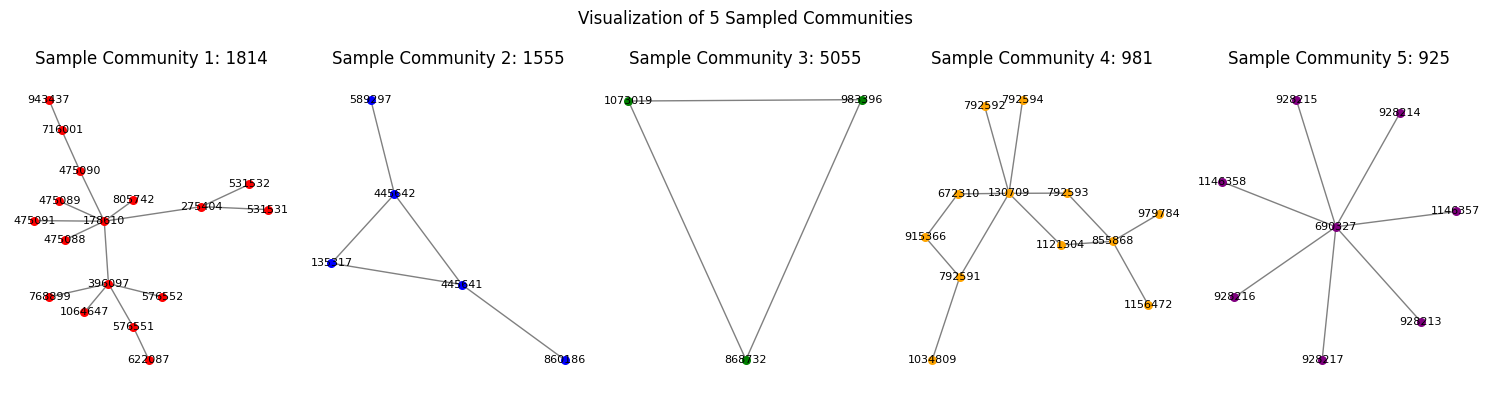

In [ ]:
# Randomly select five communities for visualization
sampled_communities = random.sample(list(communities.values()), 5)

# Predefined color order
color_order = ['red', 'blue', 'green', 'orange', 'purple']

# Set up the canvas
plt.figure(figsize=(15, 4))

# Create a subplot for each community
for i, community_nodes in enumerate(sampled_communities, start=1):
    plt.subplot(1, 5, i)
    subgraph = G.subgraph(community_nodes)
    pos = nx.spring_layout(subgraph)

    # Get the color for the current community
    community_color = color_order[i-1]

    # Draw the subgraph with node size, edge color, and node color settings
    nx.draw(subgraph, pos, node_size=30, edge_color="gray", node_color=community_color, with_labels=False)

    # Draw node labels with font size settings
    labels = {node: node for node in community_nodes}
    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8)

    # Get the community ID
    community_id = list(communities.keys())[list(communities.values()).index(community_nodes)]

    plt.title(f"Sample Community {i}: {community_id}")

plt.suptitle("Visualization of 5 Sampled Communities")
plt.tight_layout()
plt.show()